In [1]:
# importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import json

In [2]:
import psycopg2
import psycopg2.extras
import pandas as pd

# Connect to the database
connection = psycopg2.connect(host='localhost',
                             user='postgres',
                             port=5439,
                             database='postgres',
                             password='ManiAnu@12345')
connection.set_session(readonly=False, autocommit=True)

cursor = connection.cursor(cursor_factory = psycopg2.extras.RealDictCursor)

In [3]:
# Query to just validate then we have written query for altering the table
# SELECT COUNT(*)
# FROM reviews
# WHERE (CASE
#            WHEN helpful[2] != 0 THEN helpful[1]::FLOAT / helpful[2]
#            ELSE 1
#        END) >= 0.8;


In [4]:
# Filtering the table based on the helpful
# SQL query that will delete those records which are not helpful

helpfulness_query_addcol = """ALTER TABLE reviews
ADD COLUMN help_percentage FLOAT;"""
helpfulness_update = """UPDATE reviews
SET help_percentage = CASE
                        WHEN helpful[2] != 0 THEN helpful[1]::FLOAT / helpful[2]
                        ELSE 1
                    END;"""
delete_records_query = "DELETE FROM reviews WHERE help_percentage < 0.8;"

In [5]:
# Altering the table by removing those records which aren't helpful
cursor.execute(helpfulness_query_addcol)
cursor.execute(helpfulness_update)
cursor.execute(delete_records_query)

In [6]:
cursor.execute("select * from reviews r ;")

In [7]:
len(cursor.fetchall())

855124

In [ ]:
# Now we removed those records which for sure are not much helpful as a part of the solution build
# The next steps finding the distribution of the users reviewing

In [8]:
# query to get the frequency of the products
products_review_count = """SELECT asin, COUNT(*) AS product_count
FROM reviews
GROUP BY asin
"""

In [9]:
cursor.execute(products_review_count)

In [10]:
product_counts = cursor.fetchall()

In [11]:
counts_products = [product_counts[c]['product_count'] for c in range(len(product_counts))]

Text(0.5, 1.0, 'Histogram with Log Count of Products Reviewed')

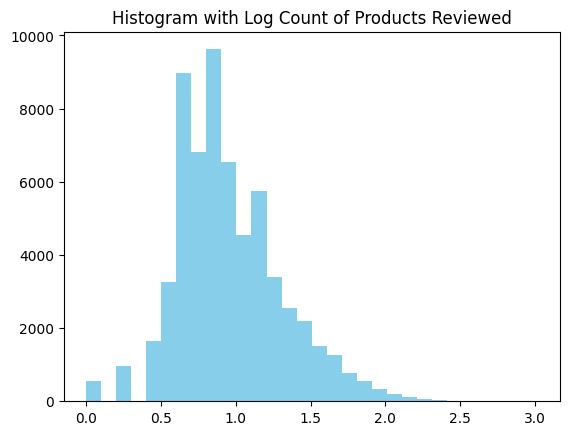

In [12]:
log_data = np.log10(counts_products)  # Apply log transformation
plt.hist(log_data, bins=30, color='skyblue')
plt.title('Histogram with Log Count of Products Reviewed')


In [50]:
# query for selecting the products which are reviewed atleast 30 times 
# SELECT count(*)
# FROM reviews
# WHERE asin IN (
#     SELECT asin 
#     FROM reviews
#     GROUP BY asin 
#     HAVING COUNT(*) > 40
# );

In [13]:
# query to delete those records for which books it was reviewed less than 40 times
query_deleting_least_reviewed_books = """DELETE FROM reviews
WHERE asin IN (
    SELECT asin
    FROM reviews
    GROUP BY asin
    HAVING COUNT(*) < 40
);"""

In [14]:
cursor.execute(query_deleting_least_reviewed_books)

In [54]:
# lets understand the counts of users who reviewed the books

In [15]:
# frequency of user count
user_review_count = """SELECT reviewerID, COUNT(*) AS user_count
FROM reviews
GROUP BY reviewerID
"""

In [16]:
cursor.execute(user_review_count)

In [17]:
user_counts = cursor.fetchall()

In [18]:
counts_users = [user_counts[c]['user_count'] for c in range(len(user_counts))]

Text(0.5, 1.0, 'Histogram with Log Count of Users Reviewed')

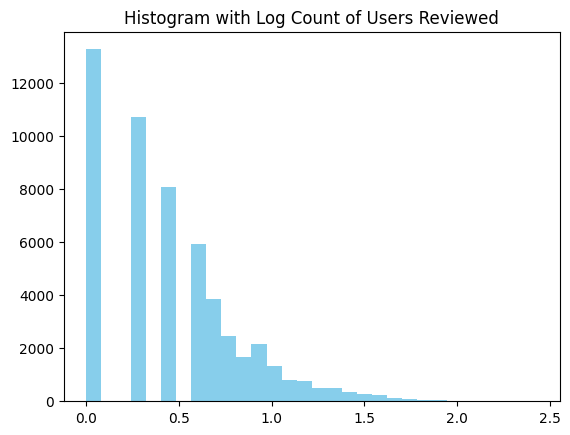

In [19]:
log_data = np.log10(counts_users)  # Apply log transformation, ensure data is positive
plt.hist(log_data, bins=30, color='skyblue')
plt.title('Histogram with Log Count of Users Reviewed')

In [63]:
# Query for selecting those users who have reviewed atleast 15 books
# SELECT count(*)
# FROM reviews
# WHERE reviewerid  IN (
#     SELECT reviewerid 
#     FROM reviews
#     GROUP BY reviewerid 
#     HAVING COUNT(*) > 15
# );

In [20]:
# query to delete those users who haven't reviewed atleast 10 books
query_deleting_least_reviewed_users = """DELETE FROM reviews
WHERE reviewerid IN (
    SELECT reviewerid
    FROM reviews
    GROUP BY reviewerid
    HAVING COUNT(*) < 10
);"""

In [21]:
cursor.execute(query_deleting_least_reviewed_users)

In [25]:
# getting unique users
cursor.execute("""select count(distinct reviewerid) from reviews;""")
count = cursor.fetchall()
count[0]['count']

5102

In [26]:
# getting unique products
cursor.execute("""select count(distinct asin) from reviews;""")
count = cursor.fetchall()
count[0]['count']

3494